## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1          X2        X3        X4           Y
0  96.051489  972.301834  0.961019  1.904007  939.322281
1  65.537334  150.979205  0.819726  5.044036  139.954707
2  83.166804  195.561714  0.334248  4.628763  105.764898
3  80.915346  425.388585  0.565601  8.625115  253.813654
4  63.377008  994.894599  0.060483  1.299712   87.420009


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9713034	total: 57.9ms	remaining: 57.9s
1:	learn: 0.9614573	total: 58.5ms	remaining: 29.2s
2:	learn: 0.9515209	total: 59ms	remaining: 19.6s
3:	learn: 0.9411915	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9277212	total: 60ms	remaining: 11.9s
5:	learn: 0.9164988	total: 60.5ms	remaining: 10s
6:	learn: 0.9035564	total: 61ms	remaining: 8.66s
7:	learn: 0.8899873	total: 61.5ms	remaining: 7.63s
8:	learn: 0.8784628	total: 62.2ms	remaining: 6.84s
9:	learn: 0.8657552	total: 62.8ms	remaining: 6.22s
10:	learn: 0.8562104	total: 63.4ms	remaining: 5.7s
11:	learn: 0.8433880	total: 64.2ms	remaining: 5.28s
12:	learn: 0.8320720	total: 64.7ms	remaining: 4.91s
13:	learn: 0.8206491	total: 65.2ms	remaining: 4.59s
14:	learn: 0.8099758	total: 65.8ms	remaining: 4.32s
15:	learn: 0.8006739	total: 66.3ms	remaining: 4.08s
16:	learn: 0.7889668	total: 66.8ms	remaining: 3.86s
17:	learn: 0.7797146	total: 67.4ms	remaining: 3.67s
18:	learn: 0.7723313	total: 67.8ms	remaining: 3.5s
19

113:	learn: 0.2576620	total: 110ms	remaining: 858ms
114:	learn: 0.2549519	total: 111ms	remaining: 853ms
115:	learn: 0.2523000	total: 111ms	remaining: 848ms
116:	learn: 0.2497370	total: 112ms	remaining: 842ms
117:	learn: 0.2466546	total: 112ms	remaining: 837ms
118:	learn: 0.2436266	total: 112ms	remaining: 831ms
119:	learn: 0.2419986	total: 113ms	remaining: 827ms
120:	learn: 0.2387663	total: 113ms	remaining: 822ms
121:	learn: 0.2367571	total: 114ms	remaining: 818ms
122:	learn: 0.2344858	total: 114ms	remaining: 812ms
123:	learn: 0.2326487	total: 114ms	remaining: 809ms
124:	learn: 0.2306268	total: 115ms	remaining: 805ms
125:	learn: 0.2282823	total: 116ms	remaining: 802ms
126:	learn: 0.2259140	total: 116ms	remaining: 798ms
127:	learn: 0.2231357	total: 117ms	remaining: 794ms
128:	learn: 0.2213766	total: 117ms	remaining: 790ms
129:	learn: 0.2195771	total: 117ms	remaining: 786ms
130:	learn: 0.2178850	total: 118ms	remaining: 782ms
131:	learn: 0.2155093	total: 118ms	remaining: 779ms
132:	learn: 

271:	learn: 0.0585372	total: 185ms	remaining: 495ms
272:	learn: 0.0581551	total: 185ms	remaining: 493ms
273:	learn: 0.0577138	total: 186ms	remaining: 492ms
274:	learn: 0.0573329	total: 186ms	remaining: 490ms
275:	learn: 0.0569921	total: 186ms	remaining: 489ms
276:	learn: 0.0565959	total: 187ms	remaining: 487ms
277:	learn: 0.0561545	total: 187ms	remaining: 486ms
278:	learn: 0.0557533	total: 188ms	remaining: 485ms
279:	learn: 0.0553425	total: 188ms	remaining: 483ms
280:	learn: 0.0550223	total: 188ms	remaining: 482ms
281:	learn: 0.0546653	total: 189ms	remaining: 481ms
282:	learn: 0.0542949	total: 189ms	remaining: 479ms
283:	learn: 0.0539597	total: 190ms	remaining: 478ms
284:	learn: 0.0536287	total: 190ms	remaining: 477ms
285:	learn: 0.0533001	total: 190ms	remaining: 475ms
286:	learn: 0.0528994	total: 191ms	remaining: 474ms
287:	learn: 0.0525472	total: 191ms	remaining: 473ms
288:	learn: 0.0522493	total: 192ms	remaining: 471ms
289:	learn: 0.0518861	total: 192ms	remaining: 470ms
290:	learn: 

510:	learn: 0.0196387	total: 288ms	remaining: 276ms
511:	learn: 0.0195866	total: 289ms	remaining: 275ms
512:	learn: 0.0195427	total: 289ms	remaining: 274ms
513:	learn: 0.0194693	total: 289ms	remaining: 274ms
514:	learn: 0.0193775	total: 290ms	remaining: 273ms
515:	learn: 0.0192711	total: 290ms	remaining: 272ms
516:	learn: 0.0191666	total: 291ms	remaining: 272ms
517:	learn: 0.0190641	total: 291ms	remaining: 271ms
518:	learn: 0.0189673	total: 292ms	remaining: 270ms
519:	learn: 0.0189172	total: 292ms	remaining: 270ms
520:	learn: 0.0188474	total: 292ms	remaining: 269ms
521:	learn: 0.0187583	total: 293ms	remaining: 268ms
522:	learn: 0.0186787	total: 293ms	remaining: 268ms
523:	learn: 0.0185858	total: 294ms	remaining: 267ms
524:	learn: 0.0185367	total: 294ms	remaining: 266ms
525:	learn: 0.0184701	total: 295ms	remaining: 265ms
526:	learn: 0.0184291	total: 295ms	remaining: 265ms
527:	learn: 0.0183612	total: 295ms	remaining: 264ms
528:	learn: 0.0183140	total: 296ms	remaining: 263ms
529:	learn: 

681:	learn: 0.0119982	total: 361ms	remaining: 169ms
682:	learn: 0.0119514	total: 362ms	remaining: 168ms
683:	learn: 0.0119429	total: 363ms	remaining: 167ms
684:	learn: 0.0119346	total: 363ms	remaining: 167ms
685:	learn: 0.0119264	total: 363ms	remaining: 166ms
686:	learn: 0.0118884	total: 364ms	remaining: 166ms
687:	learn: 0.0118650	total: 364ms	remaining: 165ms
688:	learn: 0.0118304	total: 365ms	remaining: 165ms
689:	learn: 0.0117813	total: 365ms	remaining: 164ms
690:	learn: 0.0117678	total: 366ms	remaining: 164ms
691:	learn: 0.0117448	total: 366ms	remaining: 163ms
692:	learn: 0.0116972	total: 366ms	remaining: 162ms
693:	learn: 0.0116892	total: 367ms	remaining: 162ms
694:	learn: 0.0116438	total: 367ms	remaining: 161ms
695:	learn: 0.0116075	total: 368ms	remaining: 161ms
696:	learn: 0.0115849	total: 368ms	remaining: 160ms
697:	learn: 0.0115358	total: 369ms	remaining: 159ms
698:	learn: 0.0114957	total: 369ms	remaining: 159ms
699:	learn: 0.0114882	total: 369ms	remaining: 158ms
700:	learn: 

916:	learn: 0.0067691	total: 465ms	remaining: 42.1ms
917:	learn: 0.0067653	total: 466ms	remaining: 41.6ms
918:	learn: 0.0067528	total: 466ms	remaining: 41.1ms
919:	learn: 0.0067324	total: 467ms	remaining: 40.6ms
920:	learn: 0.0067154	total: 467ms	remaining: 40.1ms
921:	learn: 0.0067022	total: 468ms	remaining: 39.6ms
922:	learn: 0.0066804	total: 468ms	remaining: 39.1ms
923:	learn: 0.0066613	total: 469ms	remaining: 38.5ms
924:	learn: 0.0066413	total: 469ms	remaining: 38ms
925:	learn: 0.0066228	total: 469ms	remaining: 37.5ms
926:	learn: 0.0066032	total: 470ms	remaining: 37ms
927:	learn: 0.0065929	total: 470ms	remaining: 36.5ms
928:	learn: 0.0065736	total: 471ms	remaining: 36ms
929:	learn: 0.0065663	total: 471ms	remaining: 35.5ms
930:	learn: 0.0065592	total: 472ms	remaining: 34.9ms
931:	learn: 0.0065555	total: 472ms	remaining: 34.4ms
932:	learn: 0.0065453	total: 473ms	remaining: 33.9ms
933:	learn: 0.0065263	total: 473ms	remaining: 33.4ms
934:	learn: 0.0065156	total: 473ms	remaining: 32.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


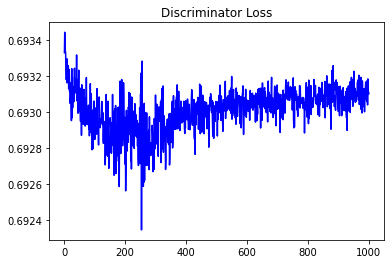

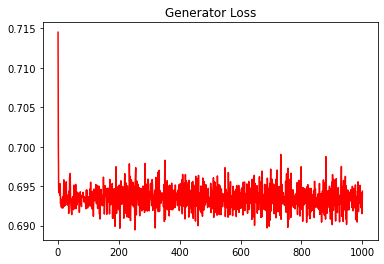

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.004312542015556559


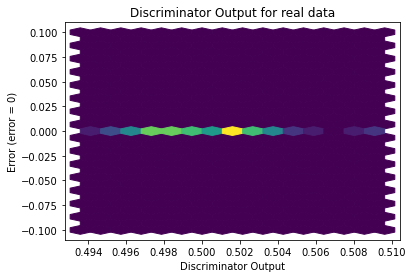

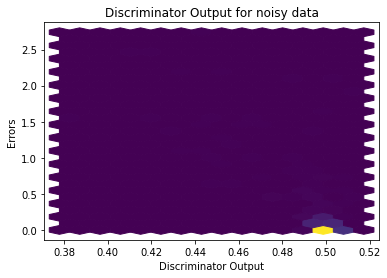

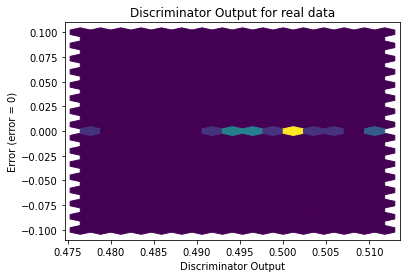

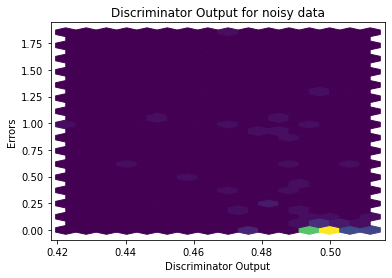

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1071]], requires_grad=True)
